# Proyecto 7: Recopilación y almacenamiento de datos (SQL)

## Descripcion del proyecto


Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Descripcion de los datos

Una base de datos con información sobre viajes en taxi en Chicago:
tabla neighborhoods: datos sobre los barrios de la ciudad
- name: nombre del barrio
- neighborhood_id: código del barrio

tabla cabs: datos sobre los taxis
- cab_id: código del vehículo
- vehicle_id: ID técnico del vehículo
- company_name: la empresa propietaria del vehículo

tabla trips: datos sobre los viajes
- trip_id: código del viaje
- cab_id: código del vehículo que opera el viaje
- start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
- end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
- duration_seconds: duración del viaje en segundos
- distance_miles: distancia del viaje en millas
- pickup_location_id: código del barrio de recogida
- dropoff_location_id: código del barrio de finalización

tabla weather_records: datos sobre el clima
- record_id: código del registro meteorológico
- ts: fecha y hora del registro (tiempo redondeado a la hora)
- temperature: temperatura cuando se tomó el registro
- description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

## Esquema de la tabla

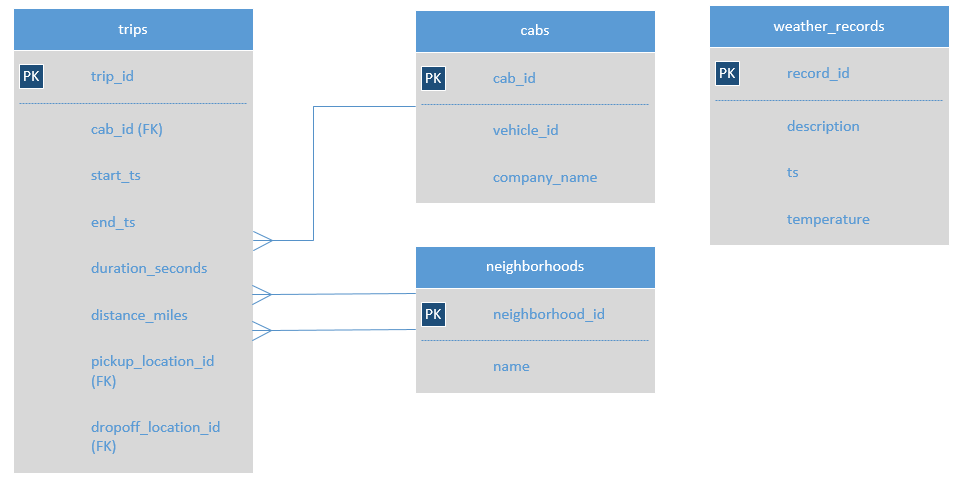

Nota: no existe una conexión directa entre las tablas trips y weather_records en la base de datos. Pero aún puedes usar JOIN y vincularlas usando la hora en la que comenzó el viaje (trips.start_ts) y la hora en la que se tomó el registro meteorológico (weather_records.ts).

## Instrucciones para completar el proyecto

### Paso 1. Escribe un código para analizar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web:

https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html

### Paso 2. Análisis exploratorio de datos

-Encuentra el número de viajes en taxi para cada empresa de taxis del 15 al 16 de noviembre de 2017. Nombra el campo resultante trips_amount y muéstralo junto con el campo company_name. Ordena los resultados por el campo trips_amount en orden descendente.

-Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

-En noviembre de 2017 las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Nombra el campo con nombres de empresas de taxis company. Ordena el resultado en orden descendente por trips_amount.

### Paso 3. Prueba la hipótesis de que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

- Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

- Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: "Bad" si el campo description contiene las palabras "rain" o "storm" y "Good" para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.

- Recupera de la tabla trips todos los viajes que comenzaron en el Loop (neighborhood_id: 50) y finalizaron en O'Hare (neighborhood_id: 63) un sábado. Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje.
Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

### Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

project_sql_result_01.csv. Contiene los siguientes datos:
- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

project_sql_result_04.csv. Contiene los siguientes datos:
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Para estos dos datasets ahora necesitas:

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

In [26]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from spicy import stats as st

# Importar Archivos
df1= pd.read_csv("datasets/project_sql_result_01.csv")
df2 = pd.read_csv("datasets/project_sql_result_04.csv")

# Estudiar los datos contenidos en los dataframe y verificar los tipos de datos
display(HTML('<h1> Datos de viajes: '))
display(df1.head())
display(df1.info())
display(HTML('<hr>'))
display(HTML('<h1> Datos de dropoff: '))
display(df2.head())
display(df2.info())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

In [9]:
# Identificar los 10 barrios principales en termino de finalizacion
top_10_dropoff = df2.sort_values(by = 'average_trips' ,ascending=False).head(10)
display(HTML('<H2> Los principales 10 barrios en terminos de finalizacion del recorrido:'))
display(top_10_dropoff)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


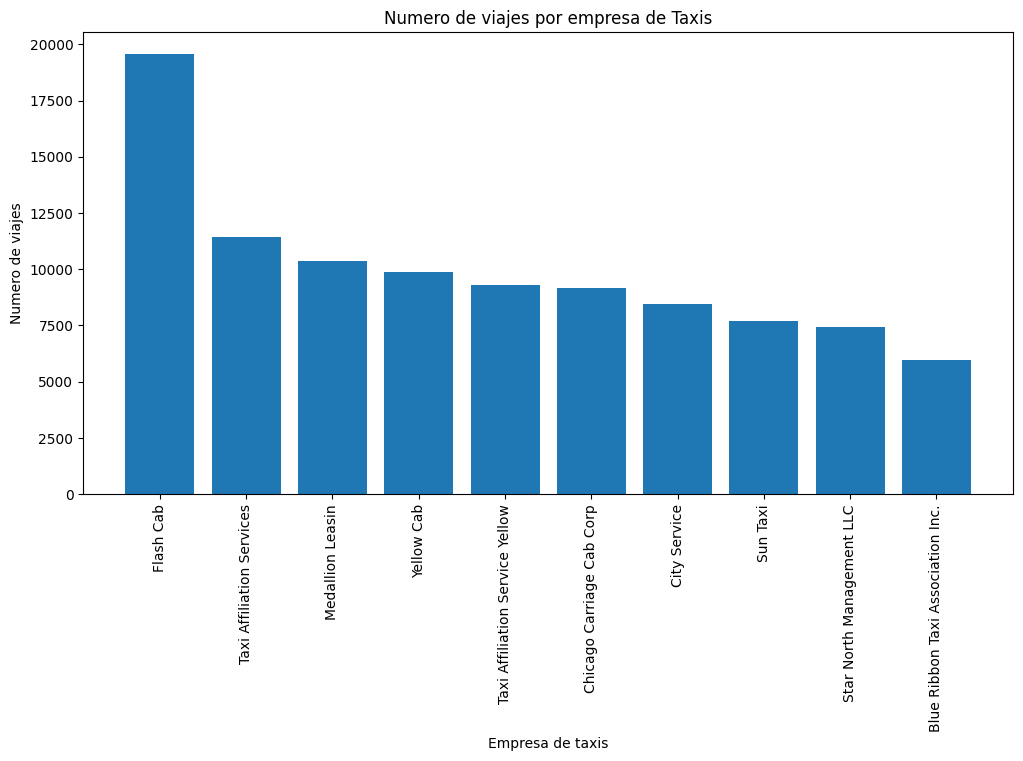

In [10]:
# Grafico Empresas de taxi y numero de viajes
top_10_taxi_company = df1.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_10_taxi_company['company_name'], top_10_taxi_company['trips_amount'])
plt.xticks(rotation=90)
plt.xlabel('Empresa de taxis')
plt.ylabel('Numero de viajes')
plt.title('Numero de viajes por empresa de Taxis')
plt.show()


#### Conclusion grafico de Numero de viajes por empresa de Taxis

En este grafico se representa la cantidad de viajes realizados para las 10 principales compañias, las compañias que presentan mas cantidad de viaje.

A continuacion las barras indican en orden descendente las compañias con mas viajes comenzando por Flash cab.

Flash cab figura como la compañia que mas viajes realiza destacandose del resto de las compañias por su gran volumen de viajes a comparacion del resto de compañias, podemos notar como el resto de las compañias se presenta una disminucion progresiva en la cantidad de viajes realizados pero sin tanta diferencia como lo es del top 1 al 2.

Hablando de cifras exactas estamos hablando que Flash cab posee 19558 viajes realizados en el top 1 mientras que el top 2 Taxi Affiliation Services muestra 11422 viajes, dejando una diferencia de 8136 viajes; Mientras que del top 2 al top 3(Medallion Leasin con 10367 viajes) hay una diferencia de 1055 viajes.

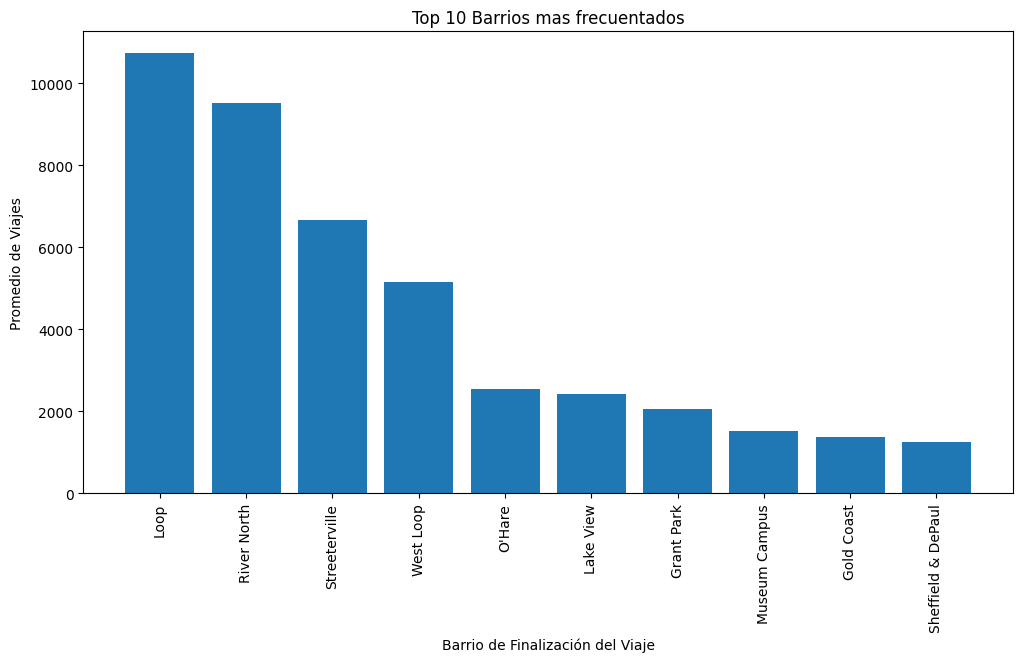

In [11]:
# Top 10 Barrios por Promedio de Finalizaciones de Viaje
plt.figure(figsize=(12,6))
plt.bar(top_10_dropoff['dropoff_location_name'], top_10_dropoff['average_trips'])
plt.xticks(rotation=90)
plt.xlabel('Barrio de Finalización del Viaje')
plt.ylabel('Promedio de Viajes')
plt.title('Top 10 Barrios mas frecuentados')
plt.show()


### Conclusion de grafico de Top 10 Barrios mas frecuentados

En este grafico de barras representa un top 10 de los barrios que son mas frecuentados por las compañias de taxi.

Se puede observar que el barrio mas visitado es el barrio "Loop" seguido de "River North" y "Streeterville"; mientras que los barrios "Gold Coast" y "Sheffield & DePaul" son los menos visitados de estos 10 barrios.

Podemos observar que el barrio Loop es el mas frecuentado de los 10 barrios mostrados en la grafica, un promedio elevado sugiere que esta es una zona o area clave en terminos de activiadad economica, turimso o densidad de poblacion. Para las compañias de taxi estos barrios podrian ser areas prioritarias y con base a ello desempeñar medidas para mejorar su servicio en estas zonas.



### Paso 5. Prueba de hipótesis (Python)

In [23]:
# Cargar el dataframe para la hipotesis
df3 = pd.read_csv("datasets/project_sql_result_07.csv")

# Convertir start_ts a tipo datetime
#df3['start_ts'] = pd.to_datetime(df3['start_ts'])

# Agregar columna para el dia de la semana
#df3['day_of_week'] = df3['start_ts'].dt.day_name()


display(HTML('<h1> Datos de viajes: '))
display(df3.head(50))
display(df3.info())

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

#### Hipotesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

Para probar la hipotesis vamos a plantear primeros las hipotesis nula (H0) y la alternativa (H1) tambien para este caro vamos a establecer el valor de alpha en 0.05 lo cual significa que estmos dispuestos a aceptar un 5% de probabilidad de rechazar la hipotesis nula cuando en realidad es verdadera (Error de tipo 1)

Hipotesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos.

Hipotesis Alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

Alpha = 0.05

In [28]:
# Filtramos datos para las condiciones buenas y malas del clima
good_weather = df3[df3['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = df3[df3['weather_conditions'] == 'Bad']['duration_seconds']


# Establecemos valor alpha
alpha = 0.05

# Realizamos la prueba t para los generos Action y Sports
results = st.ttest_ind(good_weather, bad_weather)

# Mostramos el Valor de P
print('valor p:', results.pvalue)  

# Si p es menos que alpha podemos rechazar la hipotesis nula 
if (results.pvalue < alpha):
    print("Aprobamos Hipotesis Alternativa")
    print("Hipotesis Alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos")
else:
    print("Aprobamos la Hipotesis Nula")
    print("Hipotesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos.")


valor p: 6.517970327099473e-12
Aprobamos Hipotesis Alternativa
Hipotesis Alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos
